# DATA PREPARATION

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
data1 = pd.read_csv("Rattaringlus2019.06--2019.12.csv")
data2 = pd.read_csv("Rattaringlus2019.12--2020.07.csv")
data = pd.concat([data1, data2])
data = data.reset_index(drop=True)

In [3]:
data['lockedattime'] = data['lockedattime'].astype(str).str[:8]                        
data['unlockedattime'] = data['unlockedattime'].astype(str).str[:8]
data['unlocked'] = pd.to_datetime(data['unlockedattime'] + ' ' + data['unlockedat'], format='%H:%M:%S %Y-%m-%d')
data['locked'] = pd.to_datetime(data['lockedattime'] + ' ' + data['lockedat'], format='%H:%M:%S %Y-%m-%d')
puhas = data.drop(columns=['unlockedat', 'unlockedattime', 'lockedat', 'lockedattime'])

In [4]:
for i, startstationname in enumerate(puhas.startstationname):
    x = puhas['startstationname'][i]
    y = puhas['endstationname'][i]
    z = puhas['length'][i]
    
    if x == '-- Määramata --':
        puhas.at[i, 'startstationname'] = 'Undetermined'
        x = puhas['startstationname'][i]
    if y == '-- Määramata --':
        puhas.at[i, 'endstationname'] = 'Undetermined'
        y = puhas['endstationname'][i]
    if x == 'Undetermined':
        if y != 'Undetermined':
            if z < 0.1:
                puhas.at[i, 'startstationname'] = y
    if y == 'Undetermined':
        if x != 'Undetermined':
            if z < 0.1:
                puhas.at[i, 'endstationname'] = x

In [27]:
vol1 = puhas[['startstationname', 'unlocked']]
vol1['minek'] = 1 #kui 1 siis unlocked
vol2 = puhas[['endstationname', 'locked']]
vol2['minek'] = 0 #kui 0, siis locked
vol1.rename(columns={'startstationname':'station', 'unlocked':'time'}, inplace=True)
vol2.rename(columns={'endstationname':'station', 'locked':'time'}, inplace=True)
result = pd.concat([vol1, vol2])
sorteeritud = result.sort_values('time')
sorteeritud.reset_index(drop=True)
sorteeritud = sorteeritud.loc[(sorteeritud['time'] >= '2019 06 09')]

<ipython-input-27-4842ffd13604>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol1['minek'] = 1 #kui 1 siis unlocked
<ipython-input-27-4842ffd13604>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol2['minek'] = 0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,station,time,minek
0,Warehouse,2019-06-01 09:37:57,1
1,Warehouse,2019-06-01 09:39:42,1
2,Warehouse,2019-06-01 09:41:28,1
3,Warehouse,2019-06-01 09:48:09,1
4,Warehouse,2019-06-01 10:02:54,1
...,...,...,...
2848991,Tamme gümnaasium,2020-07-31 01:30:43,0
2848992,Põhja puiestee,2020-07-31 01:37:38,0
2848993,Vahi,2020-07-31 01:41:38,0
2848994,Torni,2020-07-31 02:46:35,0


In [181]:
dokid

array(['AHHAA', 'Aleksandri', 'Anne saun', 'Annelinn',
       'Annelinna gümnaasium', 'Annelinna keskus', 'Annelinna kiir',
       'Aparaaditehas', 'Aura veekeskus', 'Delta', 'EMÜ spordihoone',
       'ERM', 'Eeden', 'Ihaste', 'J. Hurda', 'K. E. von Baeri', 'Kaare',
       'Kalda tee', 'Kannikese', 'Karete', 'Kaunase puiestee',
       'Kivilinna', 'Kopli', 'Kuu', 'Kvissentali', 'Lossi', 'Lõunakeskus',
       'Maarjamõisa', 'Magistri', 'Mõisavahe', 'Näituse', 'Orava',
       'Papli', 'Pargi', 'Pirogovi plats', 'Postimaja', 'Põhja puiestee',
       'Põllu', 'Raatuse', 'Raatuse kool', 'Rahinge', 'Rahu', 'Raja',
       'Raudteejaam', 'Riiamäe', 'Roosi', 'Ränilinn', 'Rüütli',
       'SPARK Demo', 'Sepa turg', 'Soola', 'Sõbra', 'Sõpruse sild',
       'Tamme gümnaasium', 'Tamme kool', 'Tamme puiestee',
       'Tamme staadion', 'Tarmeko', 'Torni', 'Tulbi', 'Turusild',
       'TÜ raamatukogu', 'Tähtvere spordipark', 'Töökoda', 'Ujula',
       'Undetermined', 'Uueturu', 'Vabadussild', 'Vahi', 'V

# FACTS

In [532]:
paevasSoite = puhas.loc[(puhas['unlocked'] >= '2019 06 09')]
paevasSoite = paevasSoite.loc[(puhas['length'] >= 0.2)]
paevasSoite

,length,startstationname,endstationname,unlocked,locked
16278,10.86,Sõbra,Sõbra,2019-06-09 00:00:00,2019-06-09 00:57:40
16280,1.24,Kalda tee,Põhja puiestee,2019-06-09 00:00:01,2019-06-09 00:08:56
16281,5.70,Raatuse,Ülejõe park,2019-06-09 00:00:05,2019-06-09 00:24:42
16282,0.45,Ülejõe park,Pirogovi plats,2019-06-09 00:00:10,2019-06-09 00:08:32
16283,4.53,Kaunase puiestee,Pargi,2019-06-09 00:00:11,2019-06-09 00:20:54
...,...,...,...,...,...
1424485,4.94,Raja,Anne saun,2020-07-31 00:51:56,2020-07-31 01:06:27
1424487,3.95,Rüütli,Tamme gümnaasium,2020-07-31 00:54:24,2020-07-31 01:30:29
1424488,4.34,Rüütli,Tamme gümnaasium,2020-07-31 00:55:06,2020-07-31 01:30:43
1424489,5.50,Pirogovi plats,Ränilinn,2020-07-31 00:55:32,2020-07-31 01:29:51


In [501]:
paevasSoiteMaxMin = (pd.to_datetime(paevasSoite['unlocked'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
paevasSoiteMaxMin.tail()   #kuna 31.juuli 2020 kohta olid ainult öised andmed ja hommikusi peale 5.00 avamist ei olnud, siis seda ei arvesta

,date,count
414,2020-03-01,233
415,2020-04-03,218
416,2020-02-29,191
417,2020-04-12,169
418,2020-07-31,71


In [502]:
paevasSoiteMaxMin.head()

,date,count
0,2019-06-10,15465
1,2019-06-09,13991
2,2019-06-12,12935
3,2019-06-11,10345
4,2019-06-14,9860


In [503]:
suvi = paevasSoiteMaxMin.loc[(paevasSoiteMaxMin['date'] >= '2019 06 01') & (paevasSoiteMaxMin['date'] <= '2019 09 01')]
suvi.mean()

count    5207.082353
dtype: float64

In [504]:
talv = paevasSoiteMaxMin.loc[(paevasSoiteMaxMin['date'] >= '2019 12 01') & (paevasSoiteMaxMin['date'] <= '2020 03 01')]
talv.mean()

count    559.945652
dtype: float64

In [505]:
popidStationid = paevasSoite['startstationname'].value_counts()
popidStationid.tail(10)  #eriüritusi, töökoda ja warehouse ei arvesta, samuti Ujula ja Rahinge, kuna need on 2020 suvel lisatud uued peatused

EMÜ spordihoone     5335
Kvissentali         3812
Töökoda             1310
Ujula                250
Metallica parkla     143
Warehouse            130
Rahinge               41
SPARK Demo            25
Tour d'ÖÖ             12
Lauluväljak            2
Name: startstationname, dtype: int64

In [510]:
kuusSoite = paevasSoite['unlocked'].groupby([paevasSoite.unlocked.dt.year, paevasSoite.unlocked.dt.month]).agg('count')
kuusSoite = pd.DataFrame(kuusSoite)
kuusSoite

unlocked
unlocked unlocked          
2019     6           164743
         7           131272
         8           141834
         9           107377
         10           75639
         11           44541
         12           20615
2020     1            16980
         2            13687
         3            14532
         4            14750
         5            87955
         6           125383
         7           116895

In [535]:
pikkus = pd.DataFrame(paevasSoite['length']).sort_values('length')
pikkus

,length
79124,0.20
336805,0.20
1067929,0.20
34647,0.20
979183,0.20
...,...
456314,50.86
456283,51.04
1128120,59.04
21750,59.57


# TRAIN

In [369]:
periood = sorteeritud.loc[(sorteeritud['time'] >= '2019 09 01') & (sorteeritud['time'] <= '2019 10 01')] #huvipakkuv periood algus- ja lõppkuupäev sisse
periood = periood.reset_index()
dokid = np.unique(periood[['station']].values)
tim = pd.Timestamp('2019-09-01') #perioodi alguskuupäev sisse
vahemik = pd.to_timedelta("00:20:00")                                      
uus = pd.DataFrame({'start':0} ,index = dokid)
col = pd.DataFrame({tim:0} ,index = dokid)

for i, station in enumerate(periood.station):
    station = periood['station'][i]
    time = periood['time'][i]
    minek = periood['minek'][i]
    while (abs(tim - time) > vahemik):
        uus[tim] = col
        tim += vahemik
        col = pd.DataFrame({tim:0} ,index = dokid)
    else:
        if minek == 0:
            col[tim][station] += 1
        else:
            col[tim][station] -= 1
treening = uus.drop(columns=['start'])

In [420]:
row = treening.iloc[25] #valid huvipakkuva stationi indeksi
rr = pd.DataFrame(row)
rr['time'] = rr.index
rr['weekday'] = rr['time'].dt.dayofweek
rr

,Lossi,time,weekday
2019-09-01 00:00:00,0,2019-09-01 00:00:00,6
2019-09-01 00:20:00,-1,2019-09-01 00:20:00,6
2019-09-01 00:40:00,0,2019-09-01 00:40:00,6
2019-09-01 01:00:00,0,2019-09-01 01:00:00,6
2019-09-01 01:20:00,0,2019-09-01 01:20:00,6
...,...,...,...
2019-09-30 22:00:00,0,2019-09-30 22:00:00,0
2019-09-30 22:20:00,0,2019-09-30 22:20:00,0
2019-09-30 22:40:00,0,2019-09-30 22:40:00,0
2019-09-30 23:00:00,0,2019-09-30 23:00:00,0


In [421]:
dti = pd.date_range("05:00", "23:40", freq="20min").time
w = [0, 1, 2, 3, 4, 5, 6]
graf = pd.DataFrame({'start':0} ,index = w)

for i in range(57):
    c = dti[i]
    b = rr.at_time(c)
    d = b.groupby(['weekday']).mean()
    graf[c] = d

fg = pd.DataFrame(graf.iloc[0:5].mean())
k = fg.rename(columns={0: "meanN"})

k['time'] = k.index
k['y'] = 0
k.loc[k.meanN >= 0, 'y'] = 1
q = k.drop('start', axis=0)
q[['h','m','s']] = q['time'].astype(str).str.split(':', expand=True).astype(int)
q
proov = q.drop(columns=['time'])

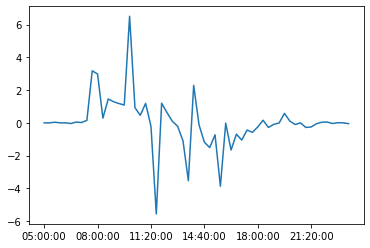

In [422]:
graf.rename(columns={'start':'05:00:00'}, inplace=True)
graf.iloc[0:5].mean().plot()

In [423]:
X_train = proov.drop(["y", "meanN"], axis=1)
y_train = proov["y"]

# TEST

In [381]:
periood = sorteeritud.loc[(sorteeritud['time'] >= '2019 10 01') & (sorteeritud['time'] <= '2019 11 01')] #perioodi algus ja lõppkuu päev sisse
periood = periood.reset_index()
dokid = np.unique(periood[['station']].values)
tim = pd.Timestamp('2019-10-01') #perioodi alguskuupäev sisse
vahemik = pd.to_timedelta("00:20:00")                                      
uus = pd.DataFrame({'start':0} ,index = dokid)               
col = pd.DataFrame({tim:0} ,index = dokid)

for i, station in enumerate(periood.station):
    station = periood['station'][i]
    time = periood['time'][i]
    minek = periood['minek'][i]
    while (abs(tim - time) > vahemik):
        uus[tim] = col
        tim += vahemik
        col = pd.DataFrame({tim:0} ,index = dokid)
    else:
        if minek == 0:
            col[tim][station] += 1
        else:
            col[tim][station] -= 1
testing = uus.drop(columns=['start'])

In [424]:
row = testing.iloc[25] #valid huvipakkuva stationi indeksi
rr = pd.DataFrame(row)
rr['time'] = rr.index
rr['weekday'] = rr['time'].dt.dayofweek
rr

,Lossi,time,weekday
2019-10-01 00:00:00,0,2019-10-01 00:00:00,1
2019-10-01 00:20:00,0,2019-10-01 00:20:00,1
2019-10-01 00:40:00,0,2019-10-01 00:40:00,1
2019-10-01 01:00:00,0,2019-10-01 01:00:00,1
2019-10-01 01:20:00,0,2019-10-01 01:20:00,1
...,...,...,...
2019-10-31 22:00:00,0,2019-10-31 22:00:00,3
2019-10-31 22:20:00,0,2019-10-31 22:20:00,3
2019-10-31 22:40:00,0,2019-10-31 22:40:00,3
2019-10-31 23:00:00,0,2019-10-31 23:00:00,3


In [425]:
dti = pd.date_range("05:00", "23:40", freq="20min").time
w = [0, 1, 2, 3, 4, 5, 6]
graf = pd.DataFrame({'start':0} ,index = w)
for i in range(57):
    c = dti[i]
    b = rr.at_time(c)
    d = b.groupby(['weekday']).mean()
    graf[c] = d
fg = pd.DataFrame(graf.iloc[0:5].mean())
k = fg.rename(columns={0: "meanN"})
k['time'] = k.index
k['y'] = 0
k.loc[k.meanN >= 0, 'y'] = 1
q = k.drop('start', axis=0)
q[['h','m','s']] = q['time'].astype(str).str.split(':', expand=True).astype(int)
q
proov = q.drop(columns=['time'])

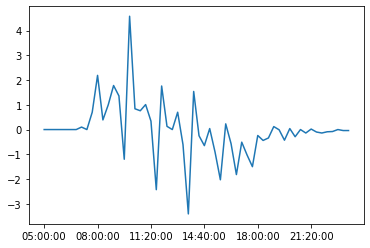

In [426]:
graf.rename(columns={'start':'05:00:00'}, inplace=True)
graf.iloc[0:5].mean().plot()

In [427]:
X_test = proov.drop(["y", "meanN"], axis=1)
y_test = proov["y"]

# MODEL

In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [430]:
model = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=0)
#model = KNeighborsClassifier(n_neighbors = 10)

model.fit(X_train, y_train)
probs = pd.DataFrame(model.predict_proba(X_test), columns=['y0','y1'])['y1']

In [431]:
x = roc_auc_score(y_test, probs)
x

0.8678660049627792